# Customer Segmentation Analysis

## Overview
This project uses the Mall Customers dataset from Kaggle to segment customers based on demographics and behavior. Focus: Feature engineering, manual segmentation, basic comparisons and inferal statistics.

**Skills Demonstrated:**
- Exploratory data analysis and data cleaning with Pandas
- Feature engineering (binning continuous variables)
- Manual customer segmentation based on business logic
- Group-by aggregations and comparative analysis
- Statistical hypothesis testing (t-tests)
- Clear visualisation and interpretation of results
- Deriving actionable business recommendations

**Tools Used:** Python (pandas, numpy, scipy, matplotlib, seaborn)

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## 1. Importing Libraries and Loading the Data

In this step, I import the required Python libraries and load the Mall Customers dataset. I also perform an initial inspection to understand its structure, check for missing values and view basic statistics.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
mall_customer_data = pd.read_csv("Mall_Customers.csv")

# Rename columns for easier use
mall_customer_data.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score',
    'CustomerID': 'Customer_ID'
}, inplace=True)

# Initial glance at data
display(mall_customer_data.head())
display(mall_customer_data.describe())

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,Customer_ID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Exploratory Data Analysis (EDA)

I will explore the distributions of Age, Annual_Income and Spending_Score, along with the Gender breakdown to better understand the customer profile and assist feature engineering.

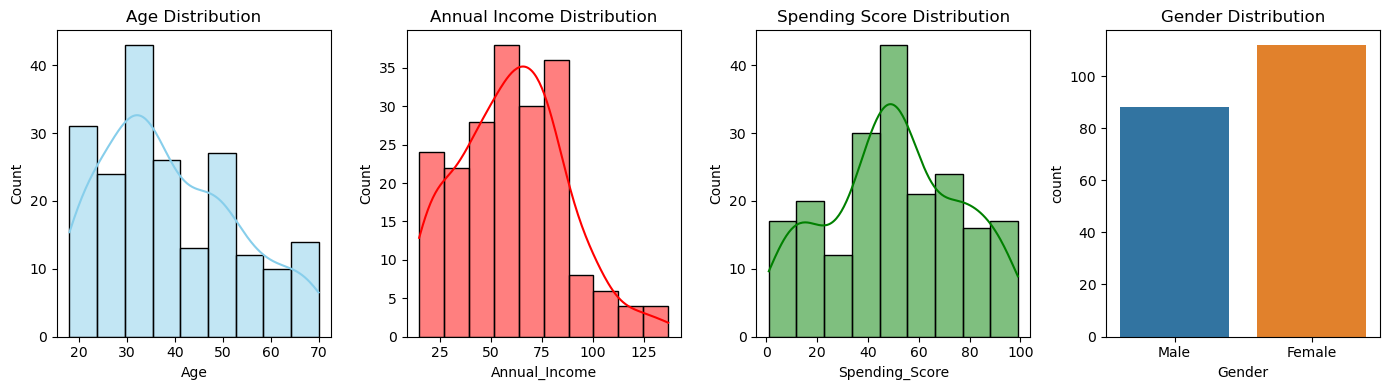

Gender Breakdown (%):
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [114]:
# Adjusting chart size balance
plt.figure(figsize=(14, 4))

# Subplot 1: Customer Age
plt.subplot(1, 4, 1)
sns.histplot(mall_customer_data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

# Suplot 2: Annual Income 
plt.subplot(1, 4, 2)
sns.histplot(mall_customer_data['Annual_Income'], kde=True, color='red')
plt.title('Annual Income Distribution')

# Subplot 3: Spending Score
plt.subplot(1, 4, 3)
sns.histplot(mall_customer_data['Spending_Score'], kde=True, color='green')
plt.title('Spending Score Distribution')

# Subplot 4: Gender
plt.subplot(1, 4, 4)
sns.countplot(x='Gender', hue='Gender', data=mall_customer_data, palette='tab10', legend=False)
plt.title('Gender Distribution')

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

# Printing Gender Breakdown exact percentages
print("Gender Breakdown (%):")
print(mall_customer_data['Gender'].value_counts(normalize=True) * 100)

**EDA Insights:**
- There are 200 customers with no missing values
- Age: 18–70, balanced age range
- Income: Right-skewed, with some high earners above 100k
- Spending Score: Roughly normally distributed, slight peaks at low and high ends
- 56% female, 44% male

## 3. Feature Engineering

Here i will create categorical features by binning continuous variables to allow grouping and segmentation:
- Age groups (demographic buckets)
- Income brackets (low, medium, high)
- Spending categories (low, medium, high)

I will then output the new categories as countplots to visualise the categorical distributions.

In [115]:
# Grouping continuous variable Age into categories
mall_customer_data['Age_Group'] = pd.cut(mall_customer_data['Age'],
                         bins=[18, 26, 36, 46, 56, mall_customer_data['Age'].max()+1],
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'],
                         right=False)

# Grouping continuous variable Income into categories
mall_customer_data['Income_Bracket'] = pd.cut(mall_customer_data['Annual_Income'],
                             bins=[0, 50, 80, mall_customer_data['Annual_Income'].max()+1],
                             labels=['Low (<50k)', 'Medium (50-80k)', 'High (>80k)'],
                             right=False)

# Grouping continuous variable Spending into categories
mall_customer_data['Spending_Category'] = pd.cut(mall_customer_data['Spending_Score'],
                                 bins=[1, 41, 61, 101],
                                 labels=['Low (1-40)', 'Medium (41-60)', 'High (61-100)'],
                                 right=False)

# Preview of new DataFrame with added columns
mall_customer_data[['Age', 'Age_Group', 'Annual_Income', 'Income_Bracket', 
    'Spending_Score', 'Spending_Category']].head()

,Age,Age_Group,Annual_Income,Income_Bracket,Spending_Score,Spending_Category
0,19,18-25,15,Low (<50k),39,Low (1-40)
1,21,18-25,15,Low (<50k),81,High (61-100)
2,20,18-25,16,Low (<50k),6,Low (1-40)
3,23,18-25,16,Low (<50k),77,High (61-100)
4,31,26-35,17,Low (<50k),40,Low (1-40)


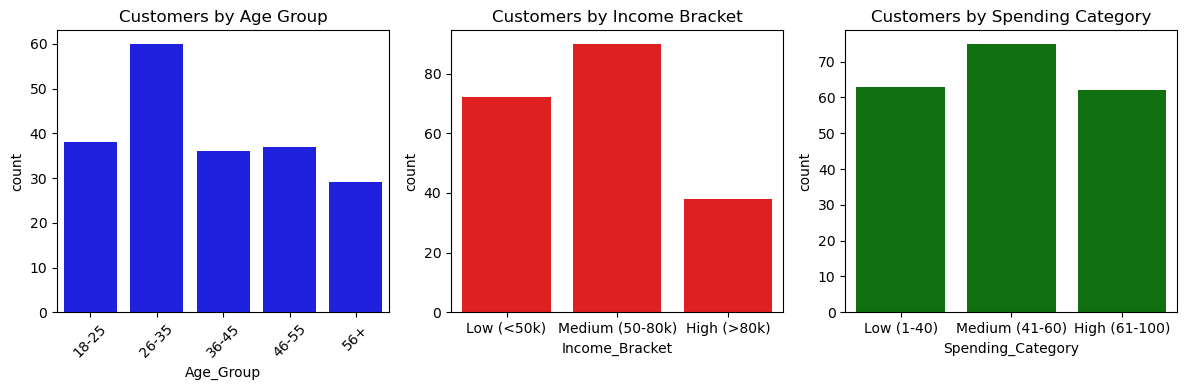

In [116]:
# Visualise categorical distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='Age_Group', data=mall_customer_data, color='Blue')
plt.title('Customers by Age Group')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='Income_Bracket', data=mall_customer_data, color='Red')
plt.title('Customers by Income Bracket')

plt.subplot(1, 3, 3)
sns.countplot(x='Spending_Category', data=mall_customer_data, color='Green')
plt.title('Customers by Spending Category')

plt.tight_layout()
plt.show()

## 4. Manual Customer Segmentation

Here I define four key behavioral segments based on logical patterns:
- High Income / Low Spend → Wealthy but cautious
- Low Income / High Spend → High spenders despite lower income
- Young High-Spenders → Age <36 and high spending (prime target)
- Older Conservative Spenders → Age >45 and low spending

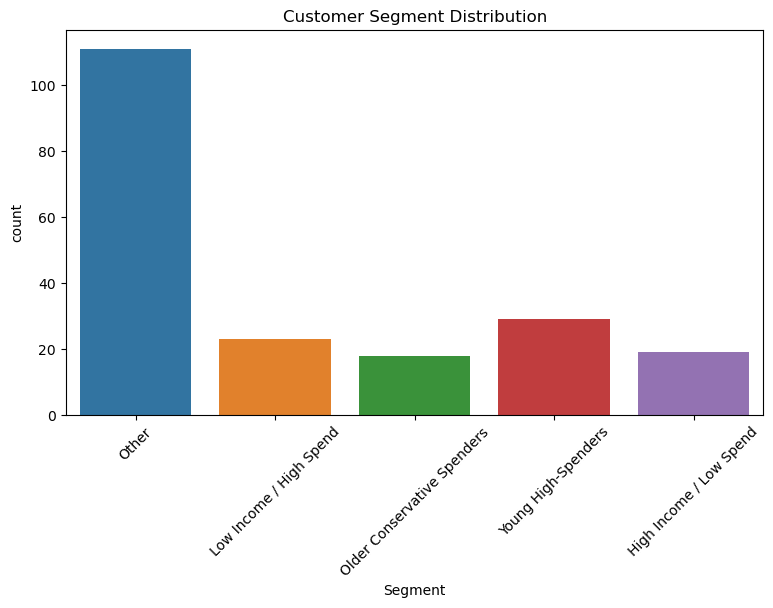

Segment
Other                          55.5
Young High-Spenders            14.5
Low Income / High Spend        11.5
High Income / Low Spend         9.5
Older Conservative Spenders     9.0
Name: proportion, dtype: float64


In [103]:
# Create Function for assigning bins to behavioural segments
def assign_segment(row):
    if row['Income_Bracket'] == 'High (>80k)' and row['Spending_Category'] == 'Low (1-40)':
        return 'High Income / Low Spend'
    elif row['Income_Bracket'] == 'Low (<50k)' and row['Spending_Category'] == 'High (61-100)':
        return 'Low Income / High Spend'
    elif row['Age'] < 36 and row['Spending_Category'] == 'High (61-100)':
        return 'Young High-Spenders'
    elif row['Age'] > 45 and row['Spending_Category'] == 'Low (1-40)':
        return 'Older Conservative Spenders'
    else:
        return 'Other'

mall_customer_data['Segment'] = mall_customer_data.apply(assign_segment, axis=1)

# Visualising behaviour segments in a countplot
plt.figure(figsize=(9, 5))
sns.countplot(x='Segment', hue='Segment', data=mall_customer_data, palette='tab10')
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45)
plt.show()

# Outputting each behavioural segment as proportions
print(mall_customer_data['Segment'].value_counts(normalize=True) * 100)

## 5. Comparative Analysis

Here I compare spending behavior across age groups, income levels and our defined behavioural segments to identify patterns and opportunities.

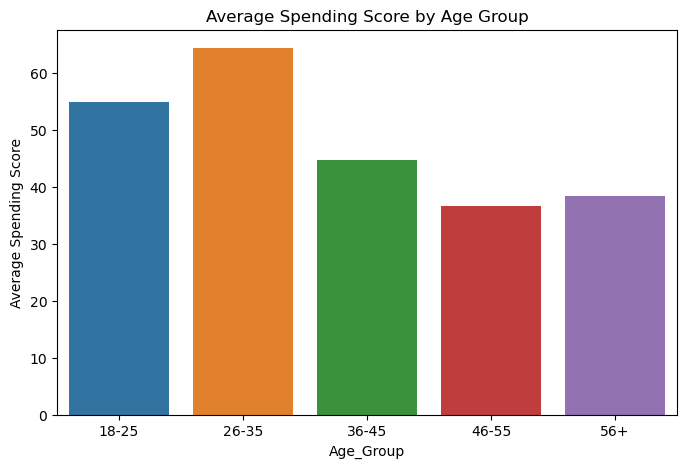

,Age_Group,Spending_Score
0,18-25,54.95
1,26-35,64.45
2,36-45,44.83
3,46-55,36.70
4,56+,38.38


In [101]:
# Average spending by age group
avg_spend_age = mall_customer_data.groupby('Age_Group', observed=True)['Spending_Score'].mean().reset_index()

# Creating bar chart plotting spending score by age group
plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Group', y='Spending_Score', data=avg_spend_age, palette='tab10', hue='Age_Group')
plt.title('Average Spending Score by Age Group')
plt.ylabel('Average Spending Score')
plt.show()

# Outputting table showing average spending score for each age group
display(avg_spend_age.round(2))

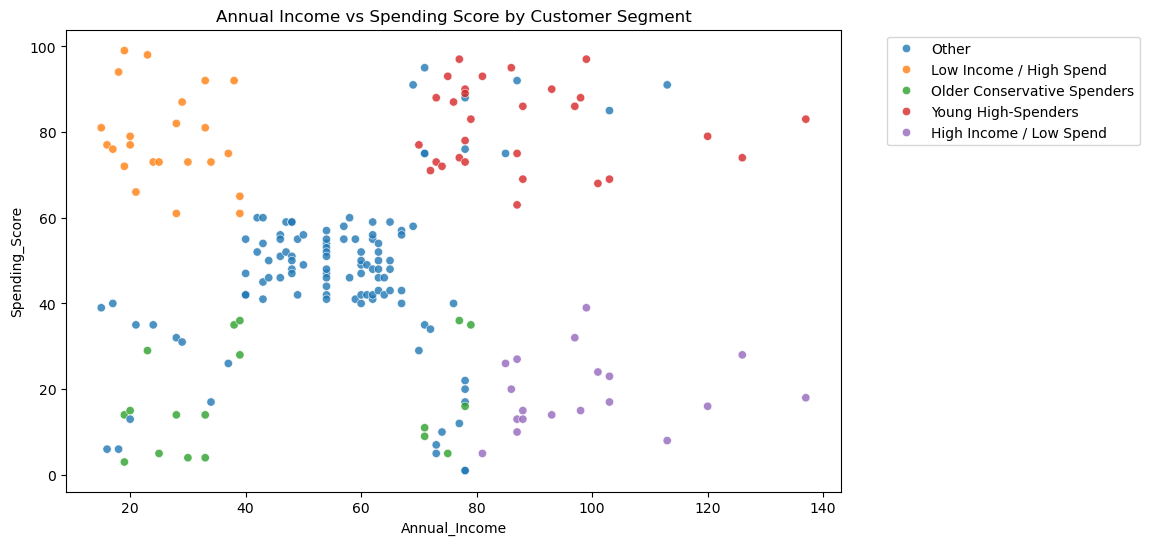

Overall correlation between Income and Spending: 0.010


In [86]:
# Income vs Spending scatter, coloured via segment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Segment', 
                data=mall_customer_data, palette='tab10', alpha=0.8)
plt.title('Annual Income vs Spending Score by Customer Segment')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left') # Positions legend slightly to upper right of the scatterplot
plt.show()

# Overall correlation calculation and output
corr = mall_customer_data['Annual_Income'].corr(mall_customer_data['Spending_Score'])
print(f'Overall correlation between Income and Spending: {corr:.3f}')

In [104]:
# Segment summary table
segment_summary = mall_customer_data.groupby('Segment').agg(
    count=('Customer_ID', 'count'),
    percentage_of_Total=('Customer_ID', lambda i: round(i.count() / len(mall_customer_data) * 100, 1)),
    avg_income=('Annual_Income', 'mean'),
    avg_spending=('Spending_Score', 'mean')
).round(2).sort_values('avg_spending', ascending=False)

display(segment_summary)

,count,percentage_of_Total,avg_income,avg_spending
Segment,,,,
Young High-Spenders,29,14.5,87.90,81.38
Low Income / High Spend,23,11.5,26.30,78.57
Other,111,55.5,56.59,46.82
High Income / Low Spend,19,9.5,98.89,19.11
Older Conservative Spenders,18,9.0,44.28,17.39


**Key Insights:**
- Younger customers (especially those in the category 18–35) have much higher average spending
- No strong overall correlation between income and spending
- "Young High-Spenders" are a small but very high-value group
- "High Income / Low Spend" customers represent a clear upsell opportunity due to their low spending habits relative to income